# Analysis with Hypernetx package<sup>1</sup>
<pre>
Dataset is of murine hematapoietic stem and progenitor cells (HSPCs)<sup>2</sup>. 
TODO: ref other things like locaTE
References:
[1] https://github.com/pnnl/HyperNetX

[2] Marot-Lassauzaie V, Bouman BJ, Donaghy FD, Demerdash Y, Essers MAG, Haghverdi L (2022) Towards reliable quantification of cell state velocities. 
    PLoS Comput Biol 18(9): e1010031. https://doi.org/10.1371/journal.pcbi.1010031
</pre>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hypernetx as hnx
import model
import utils
import glob
import pickle

# Initialization

In [2]:
# 2430 cells and 50 TFs
cell_count = 2430
gene_count = 50
infile_dir = "./../data/TEsHSPC/"
# temp_dir = "./../../locaTE.jl/examples/HSPC/mydata/networks/"
# labels_df = pd.read_csv('./../../locaTE.jl/examples/HSPC/mydata/genes.csv')
labels = utils.load_pickle(glob.glob(infile_dir + "*.pickle")[0])


In [3]:
# labels_df
labels

array(['Cebpe', 'Cenpa', 'Creb5', 'Dach1', 'Ebf1', 'Egr1', 'Ets1', 'Fos',
       'Fosb', 'Gata1', 'Gata2', 'Gata3', 'Gfi1', 'Gfi1b', 'Hlf', 'Hmga2',
       'Hmgb2', 'Hmgb3', 'Ikzf2', 'Irf7', 'Irf8', 'Klf1', 'Klf12', 'Klf2',
       'Klf6', 'Mecom', 'Mef2c', 'Meis1', 'Myb', 'Myc', 'Mycn', 'Nfe2',
       'Nfia', 'Nkx2-3', 'Pbx1', 'Pgr', 'Plek', 'Pou2f2', 'Rora', 'Satb1',
       'Spi1', 'Tox', 'Tsc22d1', 'Zbtb20', 'Zfhx3', 'Zfp36l1', 'Zfp467',
       'Zfp532', 'Zfp608', 'Zfpm1'], dtype=object)

# Graph Construction

In [4]:
m = model.HyperGraph(n_cells=cell_count, n_genes=gene_count, infile_dir=infile_dir, gene_labels=labels)
m.construct_graph(0.75) # tolerance chosen on the basis of whether it managed to produce an obvious spectral gap 
HG = hnx.classes.Hypergraph.collapse_edges(m.HG) 
# HG = m.HG

# HNX Exploration

In [5]:
L, index = hnx.algorithms.laplacians_clustering.norm_lap(HG, weights=True)
L = L.toarray()

In [6]:
eigvals, eigvecs = np.linalg.eig(L)

# sort eigenvals, then sort eigenvecs by the eigenvals
sorted_indices = np.flip(np.argsort(eigvals))
sorted_eigvals = eigvals[sorted_indices] # sort the vals
sorted_eigvecs = eigvecs[:,sorted_indices] # sorts the columns

# Sanity check to ensure eigenvecs got sorted
eps = 0.0001
min_index = np.argmin(eigvals)
if (np.sum(np.abs(np.abs(eigvecs[:,min_index]) - np.abs(sorted_eigvecs[:,L.shape[0] - 1])) < eps) != L.shape[0]):
    raise ValueError("Incorrectly sorted eigenvalues")


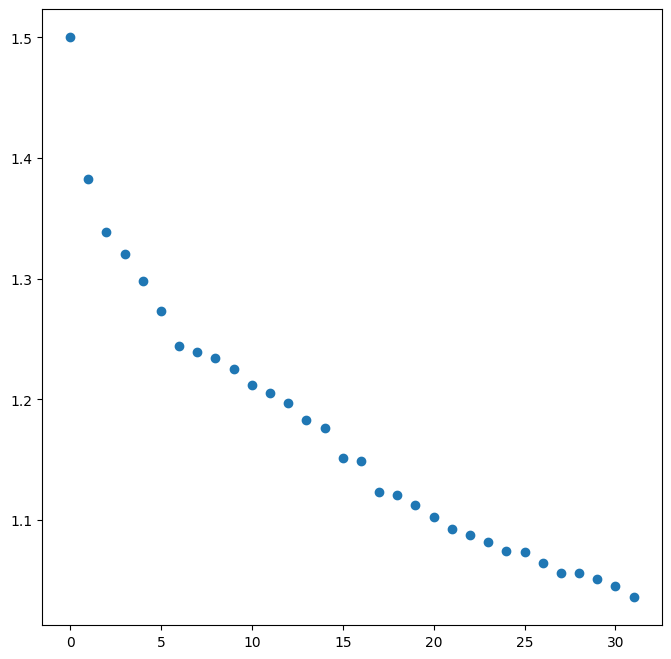

In [7]:
x = np.arange(L.shape[0])
plt.scatter(x, sorted_eigvals)

In [8]:
clusters = hnx.algorithms.laplacians_clustering.spec_clus(HG, k=3, weights=True)


In [10]:
utils.write_results(clusters, './../results/HSPC_pathways.csv')

In [ ]:
clusters